# **House Rocket Challenge**

The challenge is a simulation of a digital platform whose business model is the purchase and sale of real estate.
I'm taking the role of a data scientist hired to help find the best opportunities in the real estate market.

My main strategy is to buy good houses with great locations and low price and then resell them later with higher prices. So my job as a data scientist is answer the following questions:

Which houses should de CEO of House Rocket buy and a what purchase price?

Once the house is owned by the company, what's the best moment to sell it and what would be the sale price?

The House Rocket should do some renovation to increase the sale price? What would be the suggestions for changes? What is the increase in the price given for each renovation option?

What's the ideal house's profile based on average price and frequency?

## **Importing libraries and dataframe**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [ ]:
df = pd.read_csv("kc_house_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


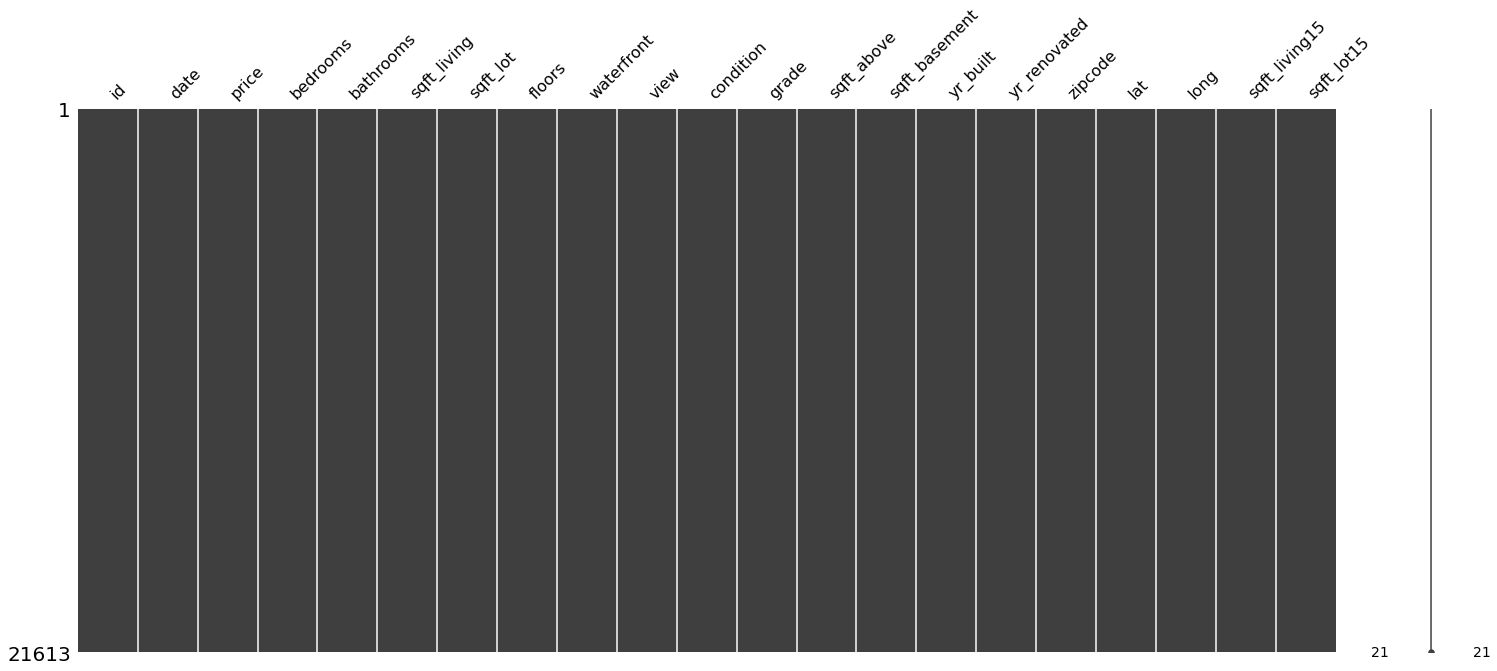

In [ ]:
%matplotlib inline
msno.matrix(df)


## **Sales throughout the year**

### **Date**

In [ ]:
df.date.describe()

count               21613
unique                372
top       20140623T000000
freq                  142
Name: date, dtype: object

In [ ]:
# Turning the column date into datetime by month
df["date"] = pd.to_datetime(df.date)
df["month"] = df.date.dt.month

# Checking the mean of price per month
df.groupby("month")["price"].mean()

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

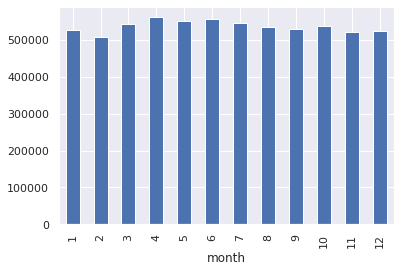

In [ ]:
# Plotting the mean of price per month
sns.set()

df_date = df.groupby("month")["price"].mean()
df_date.plot.bar()

In [ ]:
# Checking the maximum and minimum average price
df.groupby("month")["price"].mean().agg(["min", "max"])

min    507851.371200
max    561837.774989
Name: price, dtype: float64

In [ ]:
# Checking the frequency of sales per month
df.groupby("month")["price"].size()

month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: price, dtype: int64

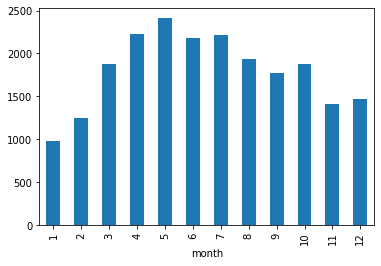

In [ ]:
# Plotting the frequency of sales per month
df.groupby("month")["price"].size().plot.bar()

The cheapest month to buy a home is **February**, while the most expensive month to buy is **April** and in addition, it has a high frequency of sales. Despite this, **there isn't a very significant change** in the purchase and sale value over the months.

## **Creating our ideal house's profile.**

### **Checking correlation between price and the others attributes**

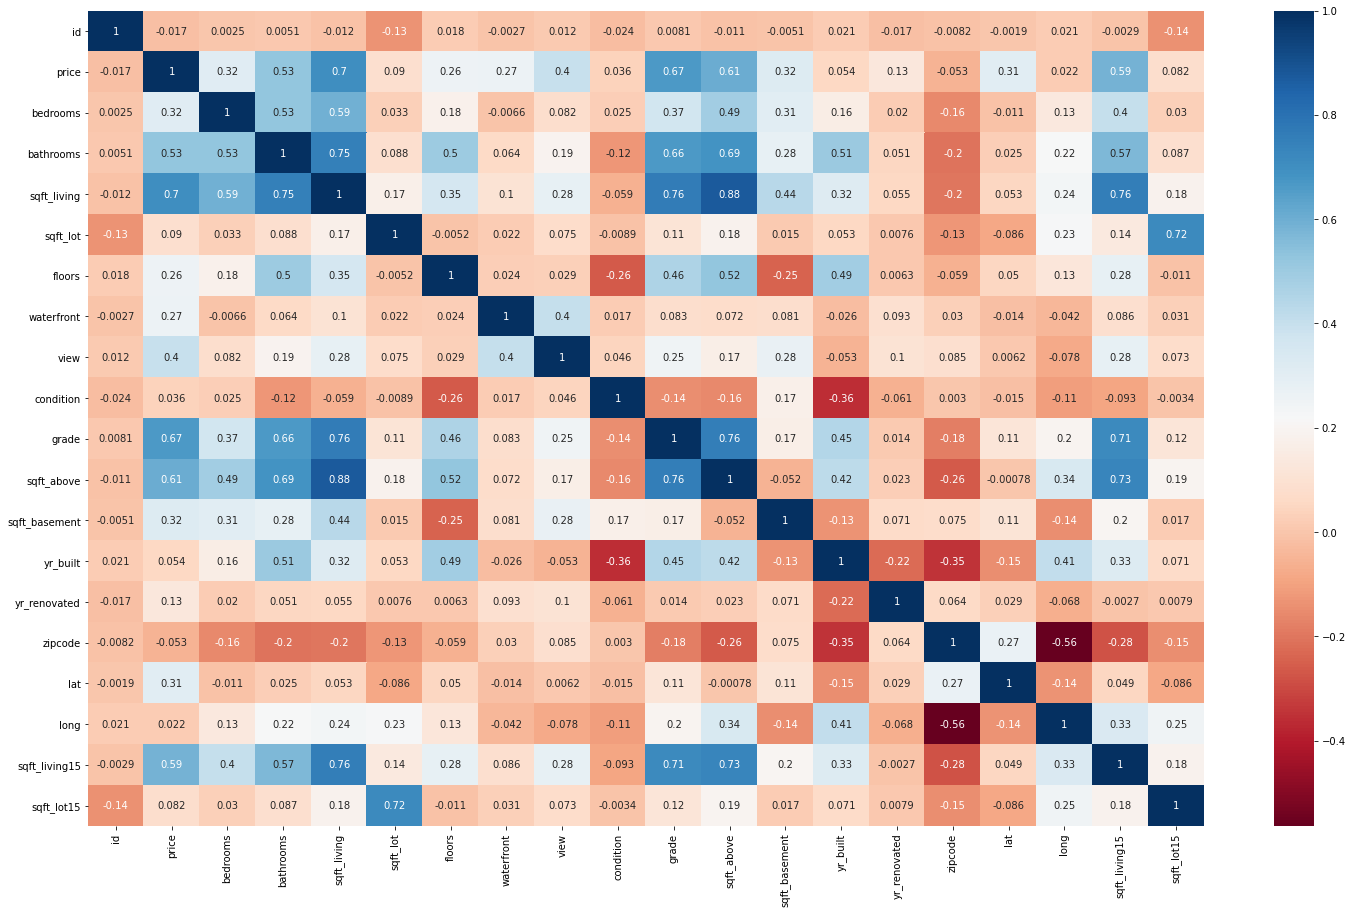

In [ ]:
# Checking and plotting the correlation between the attributes
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")


I'll take the following attributes for my exploratory data analysis, since they have higher correlations without dupplicates: **sqft_living, grade, bathrooms, view, condition and bedrooms.**

Inicially I'll find the best house profile considering mean price and frequency of each attribute.



### **Square feet**

In [ ]:
# Checking the smallest and largest house's square feet
df.sqft_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [ ]:
# Creating intervals to cut
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000,
        12000, 13000, 14000]

# Creating categories to each cut
groups = ["0-1000", "1000-2000", "2000-3000", "3000-4000", "4000-5000",
          "5000-6000", "6000-7000", "7000-8000", "8000-9000", "9000-10000",
          "10000-11000", "11000-12000", "12000-13000", "13000-14000"]

# Creating a column with the categories to each cut
df["sqft_living_per_1000"] = pd.cut(df.sqft_living, bins, labels=groups)

# formating the mean results to float
pd.options.display.float_format = '{:.2f}'.format

# Checking the average price per 1000ft²
df.groupby("sqft_living_per_1000")["price"].mean()

sqft_living_per_1000
0-1000         298301.01
1000-2000      398802.97
2000-3000      579311.20
3000-4000      872755.07
4000-5000     1326124.71
5000-6000     1783964.55
6000-7000     2136571.25
7000-8000     2680533.68
8000-9000     3766266.67
9000-10000    5707666.67
10000-11000   7062500.00
11000-12000          nan
12000-13000   7700000.00
13000-14000   2280000.00
Name: price, dtype: float64

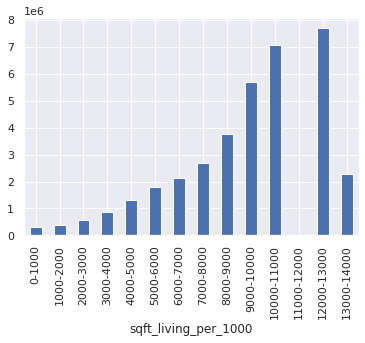

In [ ]:
# Plotting the average price per 1000ft²
df.groupby("sqft_living_per_1000")["price"].mean().plot.bar()

In [ ]:
# Checking the percentual difference between average price of the categories
df.groupby("sqft_living_per_1000")["price"].mean().pct_change()

sqft_living_per_1000
0-1000          nan
1000-2000      0.34
2000-3000      0.45
3000-4000      0.51
4000-5000      0.52
5000-6000      0.35
6000-7000      0.20
7000-8000      0.25
8000-9000      0.41
9000-10000     0.52
10000-11000    0.24
11000-12000    0.00
12000-13000    0.09
13000-14000   -0.70
Name: price, dtype: float64

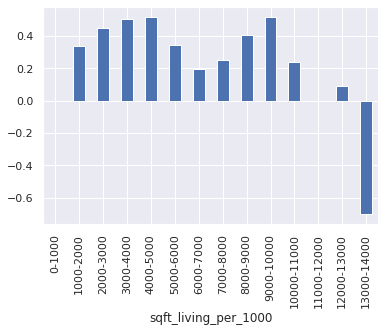

In [ ]:
# Plotting the percentual difference between the average price of the categories
df.groupby("sqft_living_per_1000")["price"].mean().pct_change().plot.bar()

In [ ]:
# Checking the frequency of sales per 1000 square feet
df.groupby("sqft_living_per_1000")["price"].size()

sqft_living_per_1000
0-1000          1494
1000-2000      10218
2000-3000       6819
3000-4000       2299
4000-5000        572
5000-6000        143
6000-7000         40
7000-8000         19
8000-9000          3
9000-10000         3
10000-11000        1
11000-12000        0
12000-13000        1
13000-14000        1
Name: price, dtype: int64

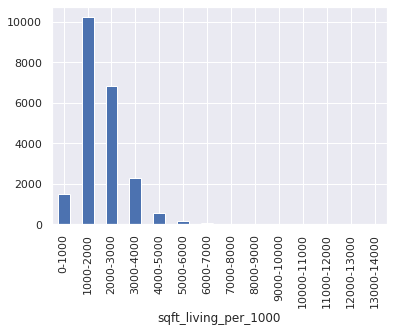

In [ ]:
# Plotting the frequency of sales per 1000 square feet
df.groupby("sqft_living_per_1000").size().plot.bar()

The highest percentages of increase in average prices occur between 3000-4000ft² and 4000-5000ft², but considering the frequency of sales where the second one has 1/4 of the number of sales, I choose **3000-4000ft²** as the ideal size for resale houses

### **Grade**

In [ ]:
# Checking minimum and maximum of grade in the df
df.grade.describe()

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [ ]:
# Checking the mean of price per grade
df.groupby("grade")["price"].mean()

grade
1     142000.00
3     205666.67
4     214381.03
5     248523.97
6     301919.64
7     402590.26
8     542852.77
9     773513.19
10   1071771.07
11   1496841.73
12   2191222.00
13   3709615.38
Name: price, dtype: float64

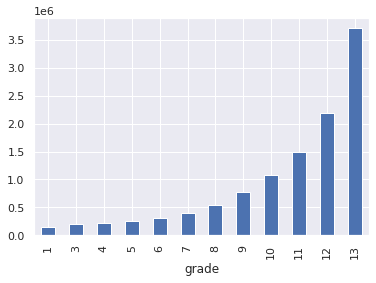

In [ ]:
# Plotting the mean of price per grade
df.groupby("grade")["price"].mean().plot.bar()

In [ ]:
# Checking the percentual difference of average price per grade
df.groupby("grade")["price"].mean().pct_change()


grade
1     nan
3    0.45
4    0.04
5    0.16
6    0.21
7    0.33
8    0.35
9    0.42
10   0.39
11   0.40
12   0.46
13   0.69
Name: price, dtype: float64

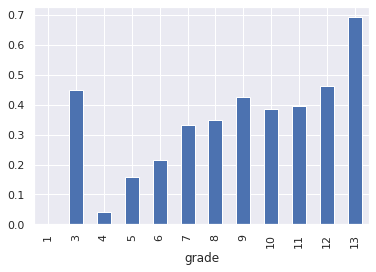

In [ ]:
# Plotting the percentual difference of average price per grade
df.groupby("grade")["price"].mean().pct_change().plot.bar()

In [ ]:
# Checking the frequency of sales per grade
df.groupby("grade").size()

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
dtype: int64

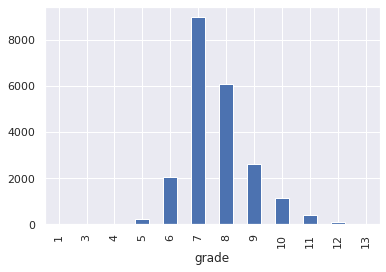

In [ ]:
df.groupby("grade").size().plot.bar()

The three biggest average price increases occur in 3, 9, 12 and 13 grades. 
Considering that the frequency of **9 grades** is much higher than the others, I choose it as the ideal house grade to resell.

### **Bathrooms**


In [ ]:
# Checking minimum and maximum of bathrooms in the df
df.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [ ]:
# Creating intervals to cut
bins = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99]

# Creating categories to each cut
groups = ["0-1", "1-2", "2-3", "3-4", "4-5",
          "5-6", "6-7", "7-8", "8-9"]

# Creating a column with the categories to each cut
df["bathrooms_per_1"] = pd.cut(df.bathrooms, bins, labels=groups)

# Checking the mean of price per bathroom
df.groupby("bathrooms_per_1")["price"].mean()

bathrooms_per_1
0-1    291513.18
1-2    397462.24
2-3    544193.29
3-4    884999.35
4-5   1398806.68
5-6   1957492.29
6-7   2729657.50
7-8   3667500.00
8-9   4990000.00
Name: price, dtype: float64

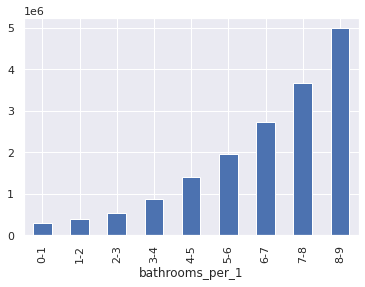

In [ ]:
# Plotting the mean of price per bathroom
df.groupby("bathrooms_per_1")["price"].mean().plot.bar()

In [ ]:
# Checking the percentual difference of average price per bathroom
df.groupby("bathrooms_per_1")["price"].mean().pct_change()

bathrooms_per_1
0-1    nan
1-2   0.36
2-3   0.37
3-4   0.63
4-5   0.58
5-6   0.40
6-7   0.39
7-8   0.34
8-9   0.36
Name: price, dtype: float64

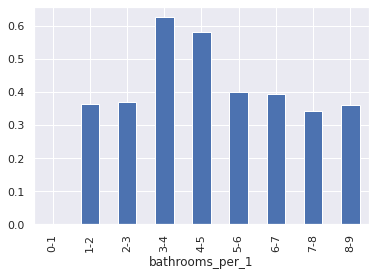

In [ ]:
# Plotting the percentual difference of average price per bathroom
df.groupby("bathrooms_per_1")["price"].mean().pct_change().plot.bar()

In [ ]:
# Checking the frequency of sales per bathroom
df.groupby("bathrooms_per_1").size()

bathrooms_per_1
0-1       76
1-2     8355
2-3    10542
3-4     2228
4-5      338
5-6       48
6-7       12
7-8        2
8-9        2
dtype: int64

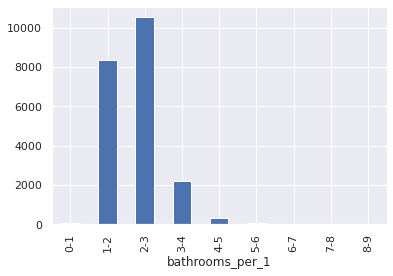

In [ ]:
# Plotting the frequency of sales per bathroom
df.groupby("bathrooms_per_1").size().plot.bar()

Considering the frequency first and the price percentage increased, the ideal number of **bathrooms is 3-4**, it's not so difficulty to sell and the price's percentage increased is bigger than 60%.

### **View**

In [ ]:
# Checking minimum and maximum of views in the df
df.view.describe()

count    21613.000000
mean         0.234303
std          0.766318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [ ]:
# Checking the mean of price per view
df.groupby("view")["price"].mean()

view
0    496564.19
1    812280.84
2    792400.89
3    971965.27
4   1463711.24
Name: price, dtype: float64

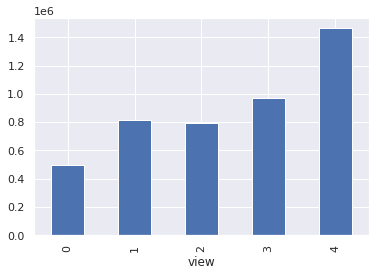

In [ ]:
# Plotting the mean of price per view
df.groupby("view")["price"].mean().plot.bar()

In [ ]:
# Checking the additional value on average per view
df.groupby("view")["price"].mean().pct_change()

view
0     nan
1    0.64
2   -0.02
3    0.23
4    0.51
Name: price, dtype: float64

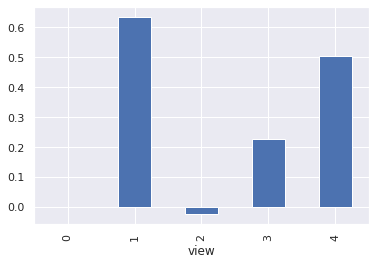

In [ ]:
# Plotting the additional value on average per view
df.groupby("view")["price"].mean().pct_change().plot.bar()

In [ ]:
# Checking the frequency of sales per view
df.groupby("view").size()

view
0    19489
1      332
2      963
3      510
4      319
dtype: int64

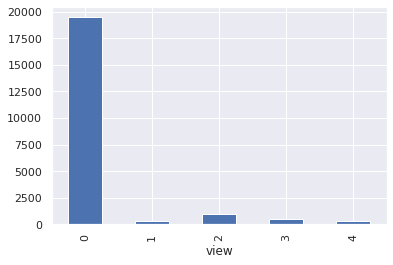

In [ ]:
# Plotting the frequency of sales per view
df.groupby("view").size().plot.bar()

Although 0 views have the best overwhelming frequency, it has a very low average sales price. On the other hand the highest mean price and the second biggest percentage increased has a considerable frequency compared to the rest. So I'm choosing **4 views** as the ideal number for a house to resell.

### **Condition**

In [ ]:
# Checking minimum and maximum of condition in the df
df.condition.describe()

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [ ]:
# Checking the mean of price per condition
df.groupby("condition")["price"].mean()

condition
1   334431.67
2   327287.15
3   542012.58
4   521200.39
5   612418.09
Name: price, dtype: float64

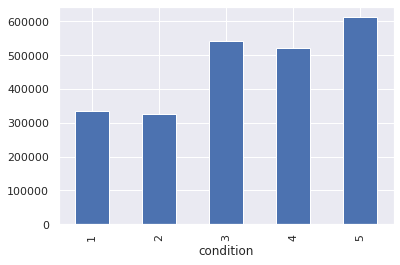

In [ ]:
# Plotting the mean of price per condition
df.groupby("condition")["price"].mean().plot.bar()

In [ ]:
# Checking the additional value on average per condition
df.groupby("condition")["price"].mean().pct_change()

condition
1     nan
2   -0.02
3    0.66
4   -0.04
5    0.18
Name: price, dtype: float64

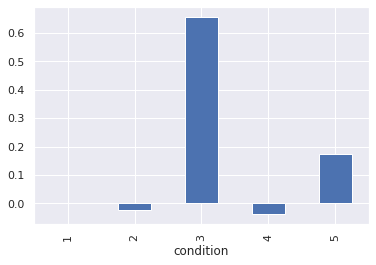

In [ ]:
df.groupby("condition")["price"].mean().pct_change().plot.bar()

In [ ]:
# Checking the frequency of sales per condition
df.groupby("condition").size()

condition
1       30
2      172
3    14031
4     5679
5     1701
dtype: int64

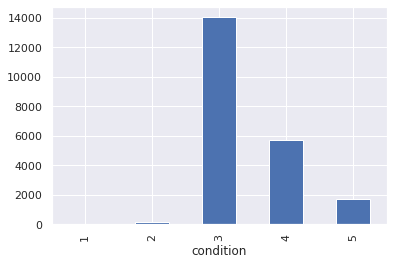

In [ ]:
# Plotting the frequency of sales per condition
df.groupby("condition").size().plot.bar()

The number of condition with a great average price and higher frequencies is 3 
and 4. Because of that, I'm choosing **3 or 4** conditions as the ideal for a house to resell.

### **Bedrooms**

In [ ]:
# Checking minimum and maximum of bedrooms in the df
df.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [ ]:
# # Checking the frequency of sales per bedroom
df.groupby("bedrooms").size()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64

In [ ]:
# Removing the outlier with 33 bedrooms
df.drop(df[df.bedrooms > 15].index, inplace=True)

df.groupby("bedrooms").size()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
dtype: int64

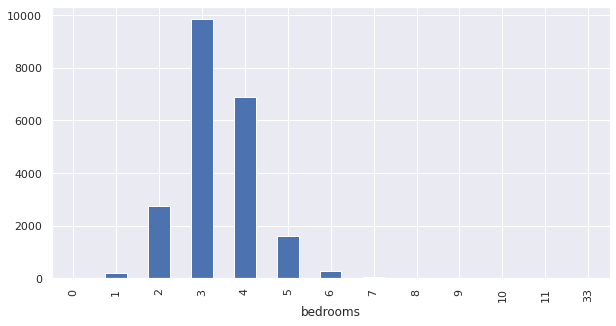

In [ ]:
# Plotting the frequency of sales per bedroom
plt.figure(figsize=(10, 5))
df.groupby("bedrooms").size().plot.bar()

In [ ]:
# Checking the mean of price per bedroom
df.groupby("bedrooms")["price"].mean()

bedrooms
0     409503.85
1     317642.88
2     401372.68
3     466232.08
4     635419.50
5     786599.83
6     825520.64
7     951184.66
8    1105076.92
9     893999.83
10    819333.33
11    520000.00
33    640000.00
Name: price, dtype: float64

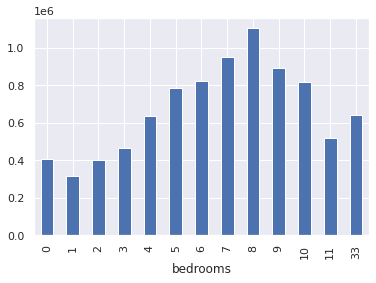

In [ ]:
df.groupby("bedrooms")["price"].mean().plot.bar()

In [ ]:
# Checking the additional value on average per bedroom
df.groupby("bedrooms")["price"].mean().pct_change()

bedrooms
0      nan
1    -0.22
2     0.26
3     0.16
4     0.36
5     0.24
6     0.05
7     0.15
8     0.16
9    -0.19
10   -0.08
11   -0.37
33    0.23
Name: price, dtype: float64

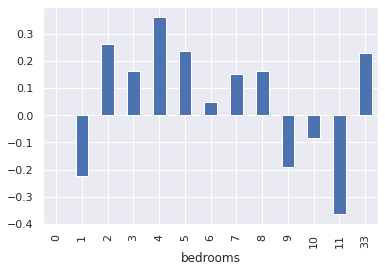

In [ ]:
# Plotting the additional value on average per bedroom
df.groupby("bedrooms")["price"].mean().pct_change().plot.bar()

I'm choosing **4 rooms** as the ideal number of bedrooms. Four bedrooms have the second highest frequency of sales and the biggest percentage increase in average price

## **Looking for the perfect fit**

In [ ]:
# Looking for houses with all ideal attributes based on correlation
df.query("sqft_living > 3000 & sqft_living <= 4000 & grade == 9 & bathrooms >= 3 & bathrooms < 4 & view == 4 & condition >= 3 & condition < 5 & bedrooms == 4")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11599,7284900030,2014-05-22,850000.0,4,3.25,3090,6744,2.0,0,4,3,9,3090,0,1923,2015,98177,47.7680,-122.388,2020,6656
12591,7922900040,2014-05-22,1075000.0,4,3.00,3600,9200,1.0,0,4,4,9,2100,1500,1976,0,98008,47.5866,-122.116,2700,9775
17151,4107100190,2015-03-24,2500000.0,4,3.75,3480,14850,1.0,0,4,3,9,1870,1610,1951,2013,98004,47.6227,-122.216,4780,18480


In [ ]:
# Checking the average price of houses with all the ideal attributes
df.query("sqft_living > 3000 & sqft_living <= 4000 & grade == 9 & bathrooms >= 3 & bathrooms < 4 & view == 4 & condition >= 3 & condition < 5 & bedrooms == 4").price.mean()

1475000.0

In [ ]:
# Creating a new mean between the average neighbordhood price and the attribute of the house with the highest correlation (square feet)
zipcode_mean_98177 = df.loc[df.zipcode == 98177].price.mean()
sqft_mean_3000_4000 = df.query("sqft_living > 3000 & sqft_living <= 4000").price.mean()

buy_value = (zipcode_mean_98177 + sqft_mean_3000_4000) / 2
buy_value

774470.2315286271

Should buy the house with **id number 7284900030** for maximum of **$774,470.00** taking into account the average value of the neighborhood and the attribute with the highest correlation. And sell it for **1,475,000.00** considerating the average price of houses with all the ideal attributes.

## **Looking for low prices with great locations**

### **Checking the best localizations**

In [ ]:
# Checking minimum and maximum of zipcodes in the df
df.zipcode.describe()

count    21613.000000
mean     98077.939805
std         53.505026
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

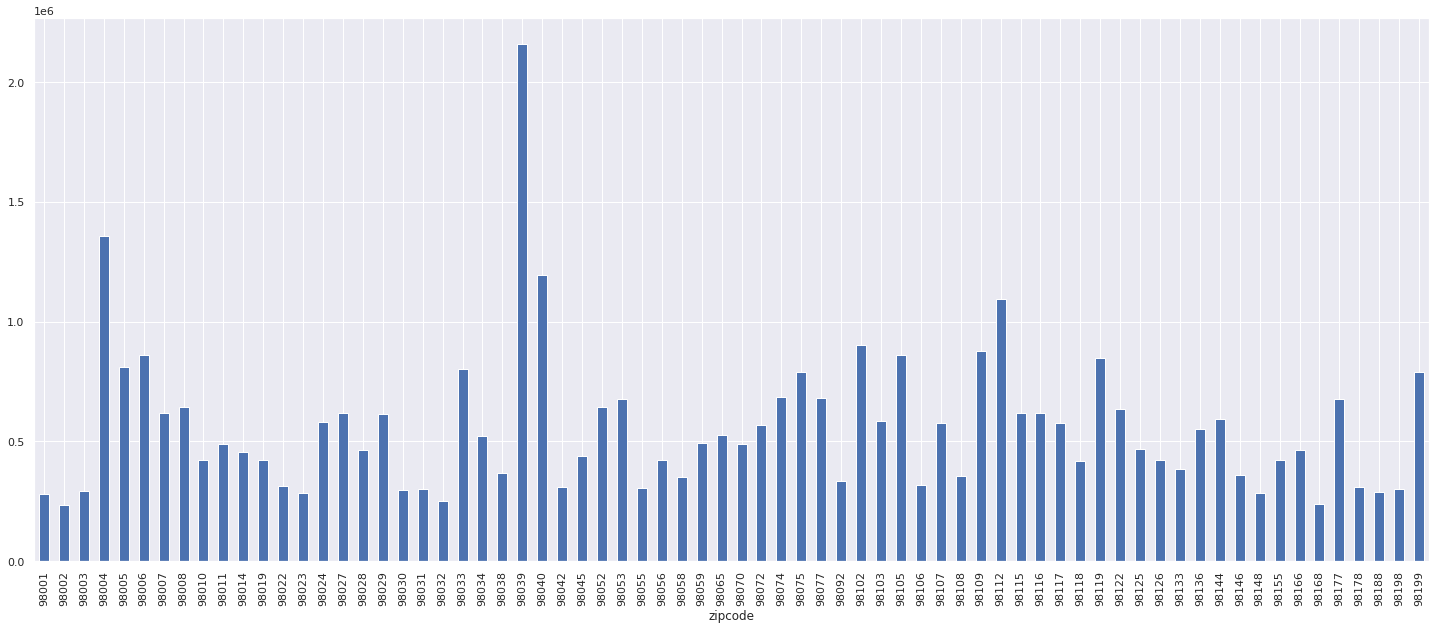

In [ ]:
# Checking the mean of price per zipcode with a grafic
zipcode_mean_price = df.groupby("zipcode")["price"].mean()
plt.figure(figsize=(25, 10))
zipcode_mean_price.plot.bar()

In [ ]:
# Selecting the top 5 zipcodes price averages
zipcode_mean_price.sort_values(ascending=False)[:5]

zipcode
98039   2160606.60
98004   1355927.08
98040   1194230.02
98112   1095499.34
98102    901258.27
Name: price, dtype: float64

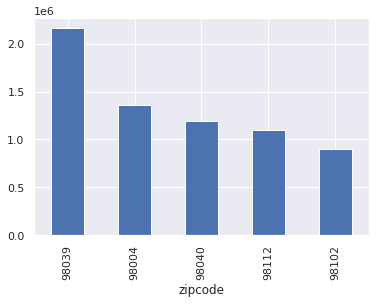

In [ ]:
# Plotting the top 5 zipcodes price averages
zipcode_mean_price.sort_values(ascending=False)[:5].plot.bar()

In [ ]:
# Creating a list with the previous top 5 zipcodes
zipcode_ideals = [98040, 98112, 98004, 98102, 98039]



In [ ]:
# Finding the frequency of sales for each zipcode in the previous list
zipcode_unique = df.zipcode.unique()

for n in zipcode_unique:
  if n in zipcode_ideals:
    zipcode_counts = df.loc[df.zipcode == n].zipcode.count()
    print(f"frequency of sales in zipcode {n}: {zipcode_counts}")

frequency of sales in zipcode 98040: 282
frequency of sales in zipcode 98112: 269
frequency of sales in zipcode 98004: 317
frequency of sales in zipcode 98102: 105
frequency of sales in zipcode 98039: 50


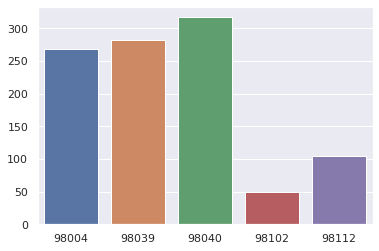

In [ ]:
# Creating a list with the frequencies found
frequencies = [282, 269, 317, 105, 50]

# Plotting the frequency of sales of the top 5 zipcodes
sns.barplot(x=zipcode_ideals, y=frequencies)

The ideal zipcode is the **98004**, because it has the second highest average price and the highest frequency of sales on the list. But all locations are great and have an average price higher than the general mean.

### **Finding low prices**

In [ ]:
# Retrieving the list of zip codes and average prices
zipcode_mean_price.sort_values(ascending=False)[:5]

zipcode
98039   2160606.60
98004   1355927.08
98040   1194230.02
98112   1095499.34
98102    901258.27
Name: price, dtype: float64

In [ ]:
# Checking houses in zipcode 98004 that have a ideal square feet living size
df.query("sqft_living > 3000 & sqft_living <= 4000 & zipcode == 98004")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
69,1802000060,2014-06-12,1325000.0,5,2.25,3200,20158,1.0,0,0,3,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
393,1653500070,2014-05-12,927000.0,4,2.75,3300,12090,2.0,0,0,3,8,3300,0,1953,0,98004,47.6294,-122.218,3180,12239
885,3323500030,2014-06-04,1270000.0,5,2.50,3200,17204,1.0,0,0,3,7,2160,1040,1952,0,98004,47.6209,-122.222,4090,15732
1282,8964800445,2015-02-09,2260000.0,3,3.50,3110,14872,1.0,0,0,3,10,3110,0,2003,0,98004,47.6178,-122.209,3110,12433
1818,9290900160,2014-09-11,1430000.0,4,2.50,3380,27589,2.0,0,0,3,10,3380,0,1966,0,98004,47.6292,-122.225,3390,20075
2449,4389200796,2014-05-22,1600000.0,3,2.50,3160,12824,1.0,0,2,4,9,1820,1340,1966,0,98004,47.6151,-122.216,3390,11985
2717,9808590310,2015-04-08,1000750.0,3,2.75,3070,10739,2.0,0,0,3,10,2440,630,1987,0,98004,47.6444,-122.191,3490,11913
3256,540100057,2015-04-28,1208000.0,4,3.75,3250,10949,2.0,0,0,4,9,2940,310,1930,1989,98004,47.6390,-122.219,2340,15234
3281,8964800025,2015-02-26,1965000.0,5,3.75,3940,13738,1.5,0,3,4,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
3526,6448000090,2014-05-12,1575000.0,5,2.75,3650,20150,1.0,0,0,4,10,2360,1290,1975,0,98004,47.6215,-122.224,3220,19800


In [ ]:
# Checking the average price of houses in zipcode 98004 that have a ideal square feet size
house_mean = df.query("sqft_living > 3000 & sqft_living <= 4000 & zipcode == 98004").price.mean()
house_mean

1532950.1694915255

In [ ]:
# Creating a lower search price to find the chapest houses
house_mean * 0.6

919770.1016949153

In [ ]:
# Reducing options when looking for cheaper houses than average using the new lower search price.
df.query("sqft_living > 3000 & sqft_living <= 4000 & zipcode == 98004 & price < 919770.10")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13357,9808590210,2014-05-13,860000.0,4,2.5,3560,11119,1.0,0,2,3,10,2290,1270,1986,0,98004,47.6456,-122.190,3290,11385
15353,644210020,2015-01-05,780000.0,4,2.5,3020,15164,1.0,0,0,4,8,1730,1290,1976,0,98004,47.5882,-122.192,2600,11556


Should buy the house with **id number 9808590210 and 644210020** for maximum of **$919,770.00** taking into account the average value of the neighborhood and the attribute with the highest correlation. And sell it for **1,532,950.00** considerating the average price of houses with those attributes.

## **Challenge answer**

Which houses should de CEO of House Rocket buy and a what purchase price? 
**The homes that the CEO must buy are divided into two groups, the first one consists of a house with all the ideal attributes and that is priced well below the average for that profile (id number: 7284900030), so the recommended purchase price is around   $774,470.00 to sell after for 1,475,000 dollars. The second one consists of two houses with a great location and a much lower price than the average for that location with an ideal square feet (id number 9808590210 / 644210020) and the recommended purchase price is around 919,770.00 to sell after for 1,532,950**

---
Once the house is owned by the company, what's the best moment to sell it and what would be the sale price? **The best moment to sell the house is from April to June, more precisely in April, since these months have the highest average price and also a good frequency of sales**

---
The House Rocket should do some renovation to increase the sale price? What would be the suggestions for changes? What is the increase in the price given for each renovation option? **Yes, the house rocket should do some renovation to the houses of the second group, increase the number of bathroom to 3 will allow to increase the price of the houses in approximately 340 thousand dollars without needing to sacrifice much of the frequency of sales.**

 ---
What's the ideal house's profile based on average price and frequency? 
**The ideal house's profile is one that has a combination of attributes that increase the value of the house and that are sold with good frequency. So the ideal home should have between 3000 to 4000ft², 9 grades, 3 to 3.75 bathrooms, 4 views, 3 or 4 conditions and 4 bedrooms. It is not surprising that the average price of houses with these attributes is 1.475 million dollars, well above the general average.**





